In [24]:
# decorators, (e.g., @), came up in looking up documentation for properties
# python has builtin function factory methods! consider:

def timed(f):
    def func(*args, **kwds):
        import time
        start = time.time()
        y = f(*args, **kwds)
        end = time.time() - start
        print('It took {0}s to run'.format(end))
        return y
    return func

In [25]:
# example function to compose with timed
def sleepy_squared(x):
    import time
    time.sleep(.1)
    return x*x

In [26]:
sleepy_squared(3)

9

In [27]:
# replace sleepy_squared with a new function, decorated by timed
sleepy_squared = timed(sleepy_squared)

In [28]:
sleepy_squared(3)

It took 0.108999967575s to run


9

In [29]:
test = timed(timed(sleepy_squared))

In [30]:
test(3)

It took 0.109999895096s to run
It took 0.109999895096s to run
It took 0.109999895096s to run


9

In [31]:
# alternatively, we can use an @ symbol
@timed
def tripled(x):
    return 3*x

# this is equivalent to doing the definition of tripled, 
# and then doing tripled= timed(tripled)

In [32]:
tripled(4)

It took 0.0s to run


12

In [33]:
# this lets your user create functions which have additional qualities (that you define!)
@timed
@timed
def squared(x):
    return x**x

In [34]:
squared(3)

It took 0.0s to run
It took 0.0s to run


27

In [41]:
# there are also such a thing as metaclassing in order to properly obscure methods, etc
# see, properties still let us change the underlying (not intended for the user) variables :(
# in order to properly scope/make private, we have to use metaclasses

In [42]:
# consider the integer 1, and a pointer to that integer 1
a = 1

In [44]:
a.__doc__ # we can call __doc__ from a

"int(x=0) -> int or long\nint(x, base=10) -> int or long\n\nConvert a number or string to an integer, or return 0 if no arguments\nare given.  If x is floating point, the conversion truncates towards zero.\nIf x is outside the integer range, the function returns a long instead.\n\nIf x is not a number or if base is given, then x must be a string or\nUnicode object representing an integer literal in the given base.  The\nliteral can be preceded by '+' or '-' and be surrounded by whitespace.\nThe base defaults to 10.  Valid bases are 0 and 2-36.  Base 0 means to\ninterpret the base from the string as an integer literal.\n>>> int('0b100', base=0)\n4"

In [45]:
1.__doc__ # but we aren't allowed to call this; 1 is a special int

SyntaxError: invalid syntax (<ipython-input-45-d16c7d3da274>, line 1)

In [46]:
# what does * mean in front of an argument?
def add(*args):
    return sum(args)

In [47]:
sum([1,2,3])

6

In [49]:
sum(1,2,3) # doesnt work

TypeError: sum expected at most 2 arguments, got 3

In [50]:
# but this works
min(1,2,3)

1

In [51]:
add(1,2,3) # will work on sum

6

In [52]:
# so, star turns the thing into a tuple
# the opposite is also true
x = [1, 2, 3]
add(*x)

6

In [53]:
# ** converts between keywords and dictionaries,
# * converts between containers

In [57]:
# returning to numpy
import numpy as np
x = np.array([0,1,2,3,4,5,6,7])
x.dtype

dtype('int32')

In [60]:
x = np.array([0,1,2,3,4,5,6,7], dtype=float)
x.dtype

dtype('float64')

In [65]:
x = np.array([0,1,2,3,4,5,6.0,'7'])
x.dtype

dtype('S32')

In [64]:
x = np.array([0,1,2,3,4,5,6,min])
x.dtype # it's a C array of python objects!
# this way, numpy can get around the "fixed" type of objects

dtype('O')

In [66]:
x = np.array([1,2,3,4,5,6,7],dtype=object)
x.dtype # takes a looooot of memory

dtype('O')

In [67]:
x = np.array([0,1,2,3,4,5,6,7])
x.dtype

dtype('int32')

In [69]:
x.dtype = 'float' # results in bad indexing
x

array([  2.12199579e-314,   6.36598737e-314,   1.06099790e-313,
         1.48539705e-313])

In [74]:
# if we just want floats in the entries, we do
x.dtype = 'int32' # (need to revert)
x.astype(float) # creates a new array

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.])

In [75]:
# confirm that this is a new array
y = x.astype(float)
y.base is x

False

In [76]:
# the reason simply changing dtype doesn't work is because the strides are different, etc

In [79]:
y = np.array(range(2,72,7))
print(y)
dy = y[1:] - y[:-1]
print(dy)

[ 2  9 16 23 30 37 44 51 58 65]
[7 7 7 7 7 7 7 7 7]


In [81]:
y = np.arange(11) # this is how to make a "range" array
print(y)
type(y)

[ 0  1  2  3  4  5  6  7  8  9 10]


numpy.ndarray

In [82]:
np.arange(2,72,7) # just like in python

array([ 2,  9, 16, 23, 30, 37, 44, 51, 58, 65])

In [83]:
np.arange(11.0) # use a float!

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [86]:
np.arange(0,10,.9) # increment by float!

array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ,
        9.9])

In [93]:
np.arange(0,10,.9999999999) # why do we get a 10?

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [94]:
np.arange(0,10,.999999999) # one fewer digit of 9

array([ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ,
        5.        ,  5.99999999,  6.99999999,  7.99999999,  8.99999999,
        9.99999999])

In [88]:
# it's only printing 8 digits of precision!
# we don't actually want the endpoint
_[10]

9.9999999989999999

In [91]:
np.arange(0,10,.99999999999999999) # now it will get omitted

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [106]:
x = np.array([0,1,2,3,4,5,6,7])
x.shape = (4,2) ; x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [107]:
x[2,1] # is not the same as

5

In [109]:
x[2][1], x[2]

(5, array([4, 5]))

In [110]:
x[::2,0] # slicing, then indexing

array([0, 4])

In [111]:
x[::2,:1] # this is just two slices

array([[0],
       [4]])

In [116]:
x[::2][:1] # the [:1] is now slicing columns of the 2d array that is returned from x[::2]

array([[0, 1]])

In [117]:
x[::2]

array([[0, 1],
       [4, 5]])

In [118]:
x[:,0] # slicing to get first column

array([0, 2, 4, 6])

In [119]:
x[0,:] # slicing to get first row

array([0, 1])

In [120]:
# moral: a slice does not reduce the dimensionality, but indexing does reduce the dimension!
# for numpy nd.arrays, prefer the multiindex; chain indexing is for python objects

In [139]:
x = np.array([0,1,2,3,4,5,6,7])
x.shape = (4,2)
y = x.reshape(2,4)
id(x), id(y) # these are different

(108941840L, 108941360L)

In [140]:
y.base is x # new metadata is created, but the underlying C array are identical

True

In [144]:
print(x)
b = y.flatten() # returns a copy the data as a 1d array
print(b)
b.base is x

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
[0 1 2 3 4 5 6 7]


False

In [145]:
c = y.ravel() # returns a reference to the same array if possible 
# (i.e., if the memory is contiguous)
c.base is x

True

In [147]:
# caution
d = x.T.flatten() # is this data preserved?
print(d)
d.base is x # numpy wants to be efficient, but the memory isn't contiguous

[0 2 4 6 1 3 5 7]


False

In [200]:
# exercise (page 161)
a = np.arange(25).reshape(5,5) ; a
# extract the data highlighted, *as 2d arrays*

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [201]:
ab = a[1::2,:3:2] ; ab # light blue

array([[ 5,  7],
       [15, 17]])

In [202]:
ao = a[:,1:4:2] ; ao # orange

array([[ 1,  3],
       [ 6,  8],
       [11, 13],
       [16, 18],
       [21, 23]])

In [203]:
ay = a[4:,:] ; ay # yellow; we use slicing and not indexing to preserve the dimension!

array([[20, 21, 22, 23, 24]])

In [204]:
a[4,:] # contrast with indexing, resulting in a 1d array

array([20, 21, 22, 23, 24])

In [205]:
# slices are references!
a[0,0] = 999
ab, ao, ay

(array([[ 5,  7],
        [15, 17]]), array([[ 1,  3],
        [ 6,  8],
        [11, 13],
        [16, 18],
        [21, 23]]), array([[20, 21, 22, 23, 24]]))

In [209]:
# fancy indexing creates a copy
x = np.arange(8).reshape(4,2)
y = x.flatten()
y[[0, 1, 5]]

array([0, 1, 5])

In [212]:
y = y**2

In [213]:
y

array([ 0,  1,  4,  9, 16, 25, 36, 49])

In [214]:
x

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [215]:
# np.where returns all the indices for which a condition is true
np.where(y > 10)

(array([4, 5, 6, 7], dtype=int64),)

In [217]:
y[np.where(y>10)] # np.where converts a mask intoa  fancy index

array([16, 25, 36, 49])

In [219]:
y > 10 # this is a mask index

array([False, False, False, False,  True,  True,  True,  True], dtype=bool)

In [220]:
y[ y > 10 ]

array([16, 25, 36, 49])

In [222]:
y[y**2 - np.sin(y) >= np. cos(y)] # math function based mask!
# the cost is the data gets copied

array([ 4,  9, 16, 25, 36, 49])

In [226]:
x, x[list(zip([0,0], [1,0], [2,1]))] # this returns the (0,0), (1,0), and (2,1) entries

(array([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7]]), array([0, 2, 5]))

In [233]:
x[[[0,1,2],[0,0,1]]] # the columns and rows need to be collected

array([0, 2, 5])

In [234]:
# fancy indexing creates a copy of the data!

In [235]:
# exercise (page )
a = np.arange(25).reshape(5,5)
# 1) extract the superdiagonal
# 2) extract all the numbers divisible by 3 using a boolean mask

In [274]:
# superdiagonal indixes are (i, i+1)
super_indices = zip([i,i+1] for i in range(4))
a[[0,1,2,3],[1,2,3,4]] # this made a copy!

array([ 1,  7, 13, 19])

In [275]:
a[a%3 == 0]

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24])

In [270]:
a.ravel()[1::6] # doesn't make a copy!

array([ 1,  7, 13, 19])

In [282]:
# caution with data types!
a[0,1] is 1

False

In [283]:
type(a[0,1])

numpy.int32

In [284]:
type(1)

int

In [285]:
# we can make structs in numpy via compound data types
foobar = np.dtype([('foo',int),('bar',float)])

In [286]:
foobar

dtype([('foo', '<i4'), ('bar', '<f8')])

In [287]:
type(foobar)

numpy.dtype

In [288]:
x = np.array([(1,2),(3,4), foobar])

In [289]:
x

array([(1, 2), (3, 4), dtype([('foo', '<i4'), ('bar', '<f8')])], dtype=object)

In [291]:
foobar['foo']

dtype('int32')

In [296]:
x[-1]['foo']

dtype('int32')

In [307]:
# numpy rules
# 1) operations between multiple array objects are first checked for proper shape match, and broadcast if nec
# 2) mathematical operators apply element by element, on the values
# 3) reduction operations (mean, sum, prod) apply to the whole array, unless specified
# 4) missing values propogate unless specified explicitly

In [308]:
type(np.nan)

float

In [309]:
np.isnan(np.nan)

True

In [310]:
np.nansum([0,1,2,3,4,np.nan,5,6,7])

28.0

In [311]:
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [317]:
a.sum()

300

In [318]:
np.sum(a)

300

In [329]:
np.inf * np.nan

nan

In [332]:
# advanced numpy

# memory mapped array doesn't read in the arrage, but creates an index of the appropriate size
# for example, if you have 1Tb of data, then taking the mean of all of the data should take nanoseconds!
# reading in the memory will take forever

# np.memmap

In [337]:
# scipy overview
# scipy submodules: special, signal, ndimage, fftpack, optimize, integrate, linalg, io, stats, cluster, sparse

import scipy.stats as ss
n = ss.norm() # this is an instance of a normal distribution
x = np.linspace(0,1,10)
n.pdf(x)
n.cdf(x)

array([ 0.5       ,  0.54423588,  0.58792955,  0.63055866,  0.67163936,
        0.71074264,  0.74750746,  0.78164998,  0.8129686 ,  0.84134475])

In [346]:
r = n.rvs(1000) # 1000 random samples from n
ss.norm.fit(r) # fit r with a normal distribution

(0.02487156931326398, 1.0281266543628724)

In [356]:
r = n.rvs(100000) # 100000 random samples from n
ss.norm.fit(r) # fit r with a normal distribution

(0.00099336004012935035, 1.005646591925762)

In [357]:
r = n.rvs(10000000) # 10000000 random samples from n
ss.norm.fit(r) # fit r with a normal distribution

(2.5994031792660371e-05, 0.99997026081350571)

In [358]:
# pandas
# read_* and to_* where * \in \{ txt, clipboard, xlsx, hdf5\}

In [360]:
# historical_data.csv -> DataFrame
# import pandas as pd
# pd.read_table('historical_data.csv', sep=',', header=1, index_col=0, parse_dates=True, na_values=['-'])

In [369]:
# parse_dates parses a string or number into a date-time object
import datetime
now = datetime.datetime.now()
print(now)
type(now), now

2017-09-13 14:09:28.279000


(datetime.datetime, datetime.datetime(2017, 9, 13, 14, 9, 28, 279000))

In [370]:
now.year, now.second

(2017, 28)

In [372]:
later = datetime.datetime.now()
delta = later - now
print(delta)

0:01:36.184000


In [388]:
datetime.datetime.strftime(now,'%Y %H')

'2017 14'

In [389]:
# the original intent for pandas was to parse timestamped objects
# this means that the row index was a timestamp (time series information)

In [391]:
import pandas as pd
s1 = pd.Series([0,1,2,3], index=list('abcd')) ; s1

a    0
b    1
c    2
d    3
dtype: int64

In [575]:
s2 = pd.Series([0,3,5,1,2], index=list('bcdef')) ; s2

b    0
c    3
d    5
e    1
f    2
dtype: int64

In [576]:
s1.values # a numpy array

array([0, 1, 2, 3], dtype=int64)

In [577]:
s1.index

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [578]:
s1['c']

2

In [579]:
s1['a':'c']

a    0
b    1
c    2
dtype: int64

In [580]:
# history: generally, the vast majority of numpy and scipy were built 
# in national labs, governent funded, and academia. milestones are spaced
# so development was more methodical. the api is developed
# on the other hand, pandas was developed at hedge-fund companies,
# where goals are set bi-weekly (!) and the api is quirky as a result

In [581]:
s1[:'c'] # unlike convention, this actually includes the end values

a    0
b    1
c    2
dtype: int64

In [582]:
d1 = pd.DataFrame({'s1':s1,'s2':s2}) ; d1

,s1,s2
a,0.0,NaN
b,1.0,0.0
c,2.0,3.0
d,3.0,5.0
e,NaN,1.0
f,NaN,2.0


In [583]:
d1.loc['c'] # DataFrames are column-row, not row-column

s1    2.0
s2    3.0
Name: c, dtype: float64

In [584]:
d1.iloc[2,1]

3.0

In [585]:
s1 +  s2 # aligns by index before summation!

a    NaN
b    1.0
c    5.0
d    8.0
e    NaN
f    NaN
dtype: float64

In [586]:
s2[1:] - s2[:-1]

b    NaN
c    0.0
d    0.0
e    0.0
f    NaN
dtype: float64

In [587]:
d1['s1'] - s1

a    0.0
b    0.0
c    0.0
d    0.0
e    NaN
f    NaN
dtype: float64

In [588]:
d1 - d1.loc['c']

,s1,s2
a,-2.0,NaN
b,-1.0,-3.0
c,0.0,0.0
d,1.0,2.0
e,NaN,-2.0
f,NaN,-1.0


In [589]:
d1 > 2

,s1,s2
a,False,False
b,False,False
c,False,True
d,True,True
e,False,False
f,False,False


In [590]:
d1[d1 > 2]

,s1,s2
a,NaN,NaN
b,NaN,NaN
c,NaN,3.0
d,3.0,5.0
e,NaN,NaN
f,NaN,NaN


In [591]:
(d1 > 2).all()

s1    False
s2    False
dtype: bool

In [592]:
d1.sum() # reduces over columns
# this has been reduced to a Series

s1     6.0
s2    11.0
dtype: float64

In [593]:
d1.mean()

s1    1.5
s2    2.2
dtype: float64

In [594]:
np.nanmean(d1.values, axis=0)

array([ 1.5,  2.2])

In [595]:
d1.mean(axis=1)

a    0.0
b    0.5
c    2.5
d    4.0
e    1.0
f    2.0
dtype: float64

In [596]:
d1.mean().mean() # caution! this isn't the real mean
# it took the mean of the columns, then the mean of those means
# however, s1 and s2 have a different number of terms

1.8500000000000001

In [597]:
d1 # observe the number of terms in s1 versus s2, skewing the weight

,s1,s2
a,0.0,NaN
b,1.0,0.0
c,2.0,3.0
d,3.0,5.0
e,NaN,1.0
f,NaN,2.0


In [598]:
d1.count() # gives the number of non-nan's in s1 and s2

s1    4
s2    5
dtype: int64

In [599]:
d1.sum().sum()/d1.count().sum() # provides the correct weighting

1.8888888888888888

In [600]:
d1['s3'] = d1['s2'] > 2

In [601]:
d1 # adding a row is expensive, but adding a new series (column) is cheap
# this is because we'd have to exten each Series!

,s1,s2,s3
a,0.0,NaN,False
b,1.0,0.0,False
c,2.0,3.0,True
d,3.0,5.0,True
e,NaN,1.0,False
f,NaN,2.0,False


In [602]:
d2 = pd.DataFrame({'s0':s2,'s1':s1})

In [603]:
d2

,s0,s1
a,NaN,0.0
b,0.0,1.0
c,3.0,2.0
d,5.0,3.0
e,1.0,NaN
f,2.0,NaN


In [707]:
d1-d2

,s0,s1,s2,s3
a,NaN,0.0,NaN,NaN
b,NaN,0.0,NaN,NaN
c,NaN,0.0,NaN,NaN
d,NaN,0.0,NaN,NaN
e,NaN,NaN,NaN,NaN
f,NaN,NaN,NaN,NaN


In [708]:
pd.concat([d1,d2])

,s0,s1,s2,s3
a,NaN,0.0,NaN,False
b,NaN,1.0,0.0,False
c,NaN,2.0,3.0,True
d,NaN,3.0,5.0,True
e,NaN,NaN,1.0,False
f,NaN,NaN,2.0,False
a,NaN,0.0,NaN,NaN
b,0.0,1.0,NaN,NaN
c,3.0,2.0,NaN,NaN
d,5.0,3.0,NaN,NaN


In [709]:
pd.concat([d1,d2],axis=1)

,s1,s2,s3,s0,s1
a,0.0,NaN,False,NaN,0.0
b,1.0,0.0,False,0.0,1.0
c,2.0,3.0,True,3.0,2.0
d,3.0,5.0,True,5.0,3.0
e,NaN,1.0,False,1.0,NaN
f,NaN,2.0,False,2.0,NaN


In [710]:
pd.concat([d1,d2],axis=1)['s1']

,s1,s1
a,0.0,0.0
b,1.0,1.0
c,2.0,2.0
d,3.0,3.0
e,NaN,NaN
f,NaN,NaN


In [711]:
s = pd.Series(5, index=['a','b','c','d','e']) ; s # broadcassting occurs

a    5
b    5
c    5
d    5
e    5
dtype: int64

In [712]:
d = {'n1':'Cary', 'n2':'Lynn', 'n3':'Sam'}
s = pd.Series(d, name='People') ; s # can name the series

n1    Cary
n2    Lynn
n3     Sam
Name: People, dtype: object

In [713]:
d1.loc[:,:'s1'] # this will be named by default as the column name

,s1
a,0.0
b,1.0
c,2.0
d,3.0
e,NaN
f,NaN


In [714]:
# because pandas is built on numpy, series have numpy functions
s2.mean(), s2.std(), s2.unique() # numpy functions ignore nan's

(2.2000000000000002, 1.9235384061671346, array([0, 3, 5, 1, 2], dtype=int64))

In [715]:
s2.unique.__module__ # is this unique function from pandas or numpy?

'pandas.core.series'

In [716]:
d1

,s1,s2,s3
a,0.0,NaN,False
b,1.0,0.0,False
c,2.0,3.0,True
d,3.0,5.0,True
e,NaN,1.0,False
f,NaN,2.0,False


In [717]:
d1['s1'].unique()

array([  0.,   1.,   2.,   3.,  nan])

In [718]:
s1.dtype

dtype('int64')

In [719]:
d1.dtypes # d1.dtype doesn't exist

s1    float64
s2    float64
s3       bool
dtype: object

In [720]:
s['n2'] # indexing like a dict

'Lynn'

In [721]:
# exercise
# 1) create a Series with the values [1,2,3,4,5], the index [1,1,2,3,5], and name it "fib"
# 2) rename the Series to "fibonacci"
# 3) select the first two elements, explicitly by position
# 4) select the first two elements, explicitly by label
# 5) take a slice consisting of every other element, starting with the first one, by position

In [722]:
f = pd.Series([1,2,3,4,5],index=[1,1,2,3,5],name='fib') ; f

1    1
1    2
2    3
3    4
5    5
Name: fib, dtype: int64

In [723]:
f.name = 'fibonacci' ; f

1    1
1    2
2    3
3    4
5    5
Name: fibonacci, dtype: int64

In [724]:
f[0:2], f.iloc[:2]

(1    1
 1    2
 Name: fibonacci, dtype: int64, 1    1
 1    2
 Name: fibonacci, dtype: int64)

In [725]:
f['1'], f.loc[1], f.loc[:1]

(1    1
 1    2
 Name: fibonacci, dtype: int64, 1    1
 1    2
 Name: fibonacci, dtype: int64, 1    1
 1    2
 Name: fibonacci, dtype: int64)

In [726]:
f.iloc[0::2]

1    1
2    3
5    5
Name: fibonacci, dtype: int64

In [727]:
# caution
f.index = [1,3,2,1,5] ; f

1    1
3    2
2    3
1    4
5    5
Name: fibonacci, dtype: int64

In [728]:
f.loc[1]

1    1
1    4
Name: fibonacci, dtype: int64

In [729]:
# caution!
f.loc[:1] # this slice no longer works!

KeyError: 'Cannot get right slice bound for non-unique label: 1'

In [730]:
# like with numpy arrays, we can use fancy indices and masked indices
s[s > 4]

n1    Cary
n2    Lynn
n3     Sam
Name: People, dtype: object

In [731]:
# more properly, should do
s.loc[s>4]

n1    Cary
n2    Lynn
n3     Sam
Name: People, dtype: object

In [734]:
f > 4

1    False
3    False
2    False
1    False
5     True
Name: fibonacci, dtype: bool

In [746]:
f.iloc[[0,1]]

1    1
3    2
Name: fibonacci, dtype: int64

In [747]:
s1 + s2

a    NaN
b    1.0
c    5.0
d    8.0
e    NaN
f    NaN
dtype: float64

In [749]:
s1.add(s2, fill_value=0) # can replace nan with a value

a    0.0
b    1.0
c    5.0
d    8.0
e    1.0
f    2.0
dtype: float64

In [751]:
pd.DataFrame({'s1':{'a':1,'b':2}, 's2':{'a':3,'c':5}})

,s1,s2
a,1.0,3.0
b,2.0,NaN
c,NaN,5.0


In [ ]:
# moral: almost all DataFrame operations produce copies to modify

In [754]:
d1.drop('s3',axis=1) # note that the original isn't touched!

,s1,s2
a,0.0,NaN
b,1.0,0.0
c,2.0,3.0
d,3.0,5.0
e,NaN,1.0
f,NaN,2.0


In [755]:
d1

,s1,s2,s3
a,0.0,NaN,False
b,1.0,0.0,False
c,2.0,3.0,True
d,3.0,5.0,True
e,NaN,1.0,False
f,NaN,2.0,False


In [762]:
del d1['s3'] # actually destroys the original data

KeyError: 's3'

In [765]:
d1

,s1,s2
a,0.0,NaN
b,1.0,0.0
c,2.0,3.0
d,3.0,5.0
e,NaN,1.0
f,NaN,2.0


In [772]:
# plotting in pandas

%matplotlib inline
# %matplotlib notebook

matplotlib.axes._subplots.AxesSubplot

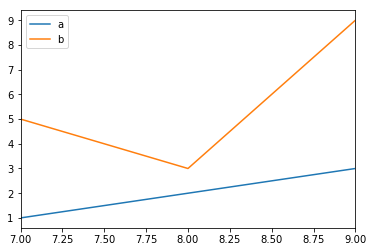

In [773]:
import matplotlib.pyplot as plt
df = pd.DataFrame({'a':[1,2,3], 'b':[5,3,9]}, index=[7,8,9])
ax = df.plot()
type(ax)

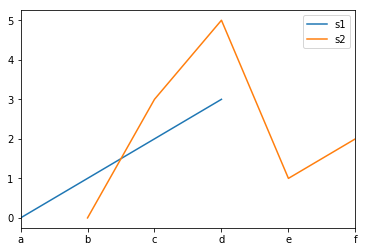

In [774]:
d1.plot()

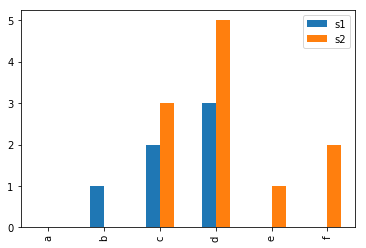

In [775]:
d1.plot(kind='bar')

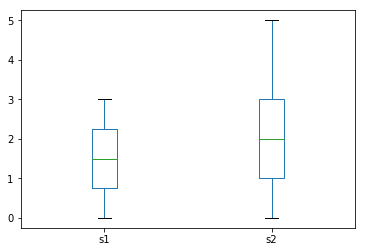

In [776]:
d1.plot(kind='box')

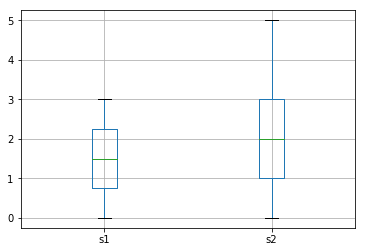

In [777]:
d1.boxplot()

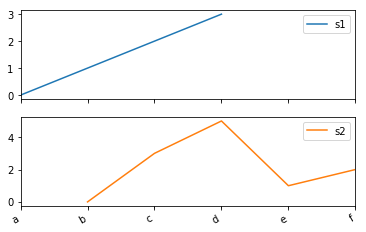

In [779]:
axes = d1.plot(subplots=True)

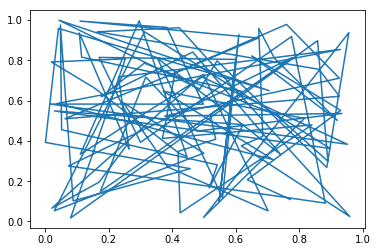

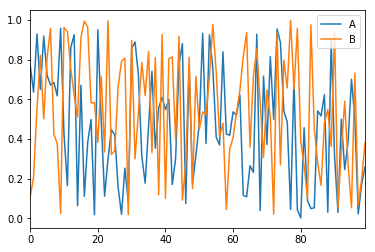

In [804]:
import numpy as np
df2 = pd.DataFrame({'A': np.random.random(100), 'B': np.random.random(100)})
plt.plot(df2['A'], df2['B'])

df2.plot()